In [ ]:
import pandas as pd 
import numpy as np 

### Data loading and model selection

In [22]:
df = pd.read_csv('./data/stock_data_preprocessed_unscaled.csv')
df.head()

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,2024-05-23,152.8,153.8,154.3,152.0,211370000.0,-1.10,153.52,154.050,152.6,155.8,153.8,152.0,152.2,1.290822
1,2024-05-22,154.5,154.8,156.1,153.9,220480000.0,0.85,153.72,154.014,152.8,152.6,155.8,153.8,152.0,1.269996
2,2024-05-21,153.2,153.0,153.3,152.3,206230000.0,0.92,153.62,153.870,154.5,152.8,152.6,155.8,153.8,1.267368
3,2024-05-20,151.8,152.0,154.4,151.5,357280000.0,0.00,153.30,153.732,153.2,154.5,152.8,152.6,155.8,1.284091
4,2024-05-17,151.8,152.0,156.5,151.6,417050000.0,-1.43,153.05,153.574,151.8,153.2,154.5,152.8,152.6,1.310852


In [23]:
# Sort the data by 'Date' in ascending order
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)


In [24]:
df.head()

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,1987-02-12,182.4,182.4,182.4,182.4,1.280000e+09,16.25,206.97,259.906,172.5,175.5,182.4,191.2,196.1,34.525934
1,1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-5.43,213.44,262.316,175.5,182.4,191.2,196.1,210.8,35.459655
2,1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,1.74,221.58,264.846,182.4,191.2,196.1,210.8,235.3,34.342743
3,1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,3.93,230.40,267.120,191.2,196.1,210.8,235.3,270.6,32.468138
4,1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,4.82,239.61,269.158,196.1,210.8,235.3,270.6,252.9,30.331848


Now the data is in ascending order according to the dates. We can go forward with model selection and training. 

### Model Selection

In [25]:

# Perform the Augmented Dickey-Fuller test to check stationarity on the 'Closing Price'
stock_data = df
from statsmodels.tsa.stattools import adfuller

# ADF test on 'Closing Price'
adf_result = adfuller(stock_data['Closing Price'])

# Extract the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

adf_statistic, p_value, critical_values


(-3.6301764848636093,
 0.005209644116798577,
 {'1%': -3.4310660523809275,
  '5%': -2.861856449258006,
  '10%': -2.56693844088655})

### ADF Test Results

#### ADF Statistic
- **Value**: -3.63

#### p-value
- **Value**: 0.0052

#### Critical Values
- **1%**: -3.43  
- **5%**: -2.86  
- **10%**: -2.57

### Interpretation
Since the ADF Statistic (-3.63) is lower than the critical values at all levels (1%, 5%, and 10%), and the p-value (0.0052) is less than 0.05, we can reject the null hypothesis of the ADF test.

### Conclusion
The data is stationary, which is a good sign for proceeding with an ARIMA model.


In [26]:
df

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,1987-02-12,182.4,182.4,182.4,182.4,1.280000e+09,16.25,206.97,259.906,172.5,175.5,182.4,191.2,196.1,34.525934
1,1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-5.43,213.44,262.316,175.5,182.4,191.2,196.1,210.8,35.459655
2,1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,1.74,221.58,264.846,182.4,191.2,196.1,210.8,235.3,34.342743
3,1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,3.93,230.40,267.120,191.2,196.1,210.8,235.3,270.6,32.468138
4,1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,4.82,239.61,269.158,196.1,210.8,235.3,270.6,252.9,30.331848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9148,2024-05-17,151.8,152.0,156.5,151.6,4.170500e+08,-1.43,153.05,153.574,151.8,153.2,154.5,152.8,152.6,1.310852
9149,2024-05-20,151.8,152.0,154.4,151.5,3.572800e+08,0.00,153.30,153.732,153.2,154.5,152.8,152.6,155.8,1.284091
9150,2024-05-21,153.2,153.0,153.3,152.3,2.062300e+08,0.92,153.62,153.870,154.5,152.8,152.6,155.8,153.8,1.267368
9151,2024-05-22,154.5,154.8,156.1,153.9,2.204800e+08,0.85,153.72,154.014,152.8,152.6,155.8,153.8,152.0,1.269996


In [27]:
import matplotlib.pyplot as plt

c:\Users\Pranav\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 7.49564
MAE: 2.15056
R-Squared: 0.98927


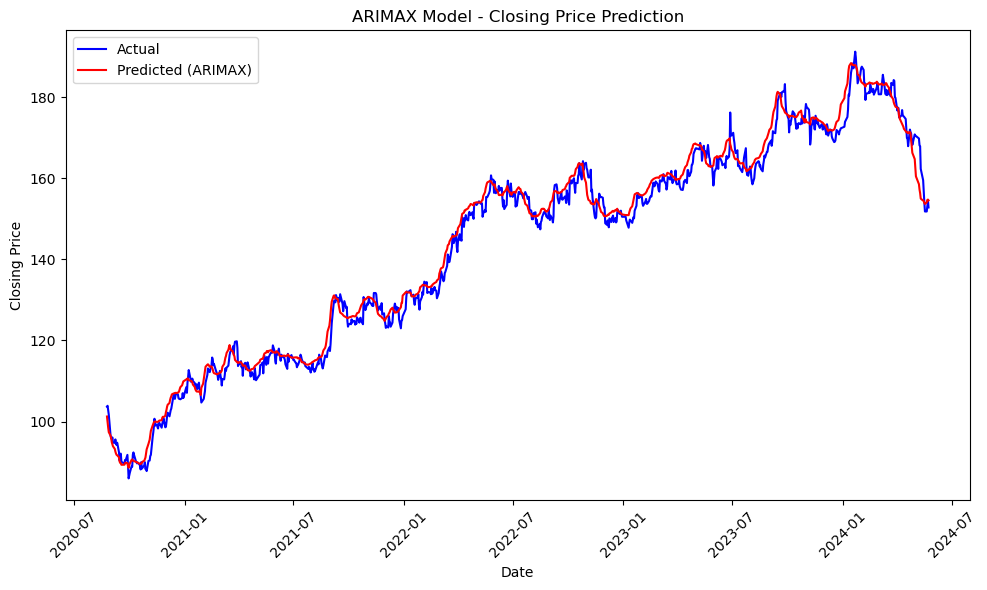

In [28]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(stock_data) * 0.9)
train_data, test_data = stock_data['Closing Price'][:train_size], stock_data['Closing Price'][train_size:]

# Define exogenous variables (for example: Volume, MA10, Volatility)
exog_train = stock_data[['Volume', 'MA10', 'Volatility']][:train_size]
exog_test = stock_data[['Volume', 'MA10', 'Volatility']][train_size:]

# Fit ARIMAX model
model_arimax = ARIMA(train_data, exog=exog_train, order=(5, 0, 0))  # Adjust p, d, q accordingly
arimax_fit = model_arimax.fit()

# Make predictions using exogenous variables for the test set
arimax_predictions = arimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Evaluate performance
mse_arimax = mean_squared_error(test_data, arimax_predictions)
mae_arimax = mean_absolute_error(test_data, arimax_predictions)

# Calculate R-Squared
ss_res = np.sum((test_data - arimax_predictions) ** 2)
ss_tot = np.sum((test_data - np.mean(test_data)) ** 2)
rsq_arimax = 1 - (ss_res / ss_tot)

# Print evaluation metrics with 5 decimal places
print(f'MSE: {mse_arimax:.5f}')
print(f'MAE: {mae_arimax:.5f}')
print(f'R-Squared: {rsq_arimax:.5f}')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data['Date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(stock_data['Date'][train_size:], arimax_predictions, label='Predicted (ARIMAX)', color='red')
plt.title('ARIMAX Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that ARIMA with other features gave us good results. But We can't take Volume and Variability features, as they won't be available to us during predictions. 

Hence we try to do predictions using Lag. 

MSE: 2.61244
MAE: 1.21030
R-Squared: 0.99626


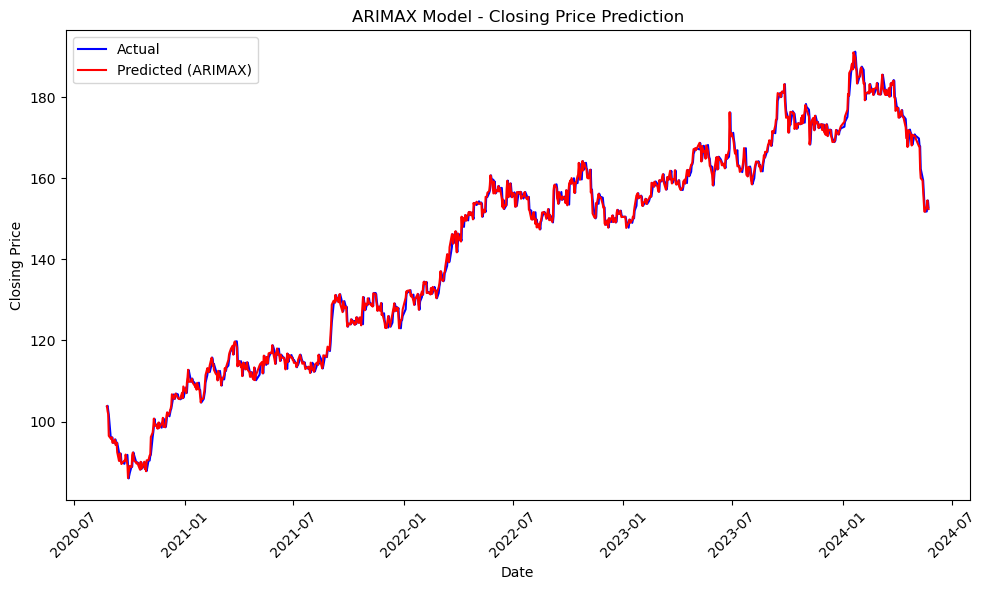

In [29]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(stock_data) * 0.9)
train_data, test_data = stock_data['Closing Price'][:train_size], stock_data['Closing Price'][train_size:]

# Using lag features (e.g., Lag_1, Lag_2, ..., Lag_5) instead of moving averages and volatility
exog_train = stock_data[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']][:train_size]
exog_test = stock_data[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']][train_size:]

# Fit ARIMAX model with lagged features as exogenous variables
model_arimax = ARIMA(train_data, exog=exog_train, order=(5, 0, 0))  # Adjust p, d, q accordingly
arimax_fit = model_arimax.fit()

# Make predictions using exogenous variables for the test set
arimax_predictions = arimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Evaluate performance
mse_arimax = mean_squared_error(test_data, arimax_predictions)
mae_arimax = mean_absolute_error(test_data, arimax_predictions)

# Calculate R-Squared
ss_res = np.sum((test_data - arimax_predictions) ** 2)
ss_tot = np.sum((test_data - np.mean(test_data)) ** 2)
rsq_arimax = 1 - (ss_res / ss_tot)

# Print evaluation metrics with 5 decimal places
print(f'MSE: {mse_arimax:.5f}')
print(f'MAE: {mae_arimax:.5f}')
print(f'R-Squared: {rsq_arimax:.5f}')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data['Date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(stock_data['Date'][train_size:], arimax_predictions, label='Predicted (ARIMAX)', color='red')
plt.title('ARIMAX Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Epoch 1/25
256/256 [==============================] - 19s 59ms/step - loss: 6865.7412
Epoch 2/25
256/256 [==============================] - 14s 53ms/step - loss: 4895.5366
Epoch 3/25
256/256 [==============================] - 12s 49ms/step - loss: 3706.8625
Epoch 4/25
256/256 [==============================] - 12s 48ms/step - loss: 2975.1614
Epoch 5/25
256/256 [==============================] - 12s 48ms/step - loss: 2558.0110
Epoch 6/25
256/256 [==============================] - 13s 50ms/step - loss: 2345.4250
Epoch 7/25
256/256 [==============================] - 13s 52ms/step - loss: 2246.9939
Epoch 8/25
256/256 [==============================] - 13s 49ms/step - loss: 1890.9084
Epoch 9/25
256/256 [==============================] - 13s 50ms/step - loss: 1444.8733
Epoch 10/25
256/256 [==============================] - 13s 49ms/step - loss: 1207.1940
Epoch 11/25
256/256 [==============================] - 15s 58ms/step - loss: 1032.4865
Epoch 12/25
256/256 [==============================]

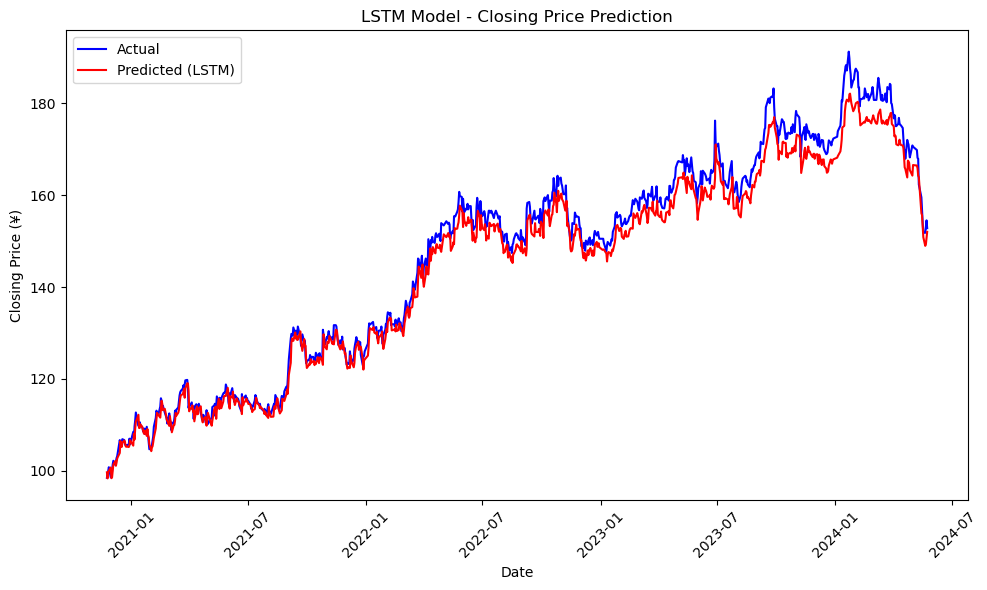

MSE: 11.31647
MAE: 2.72017
R-Squared: -1614.82351


In [30]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Prepare the data for LSTM
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

# Assuming 'df' is your DataFrame with the 'Date' and 'Closing Price' columns.
# Convert 'Closing Price' to numpy array
data = df['Closing Price'].values.reshape(-1, 1)

# Split data into training and testing sets
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size], data[train_size:]

# Create the LSTM input dataset
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=128, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(units=64))
model_lstm.add(Dense(1))

# Compile and train the LSTM model
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, Y_train, epochs=25, batch_size=32, verbose=1)

# Predict on test data
lstm_predictions = model_lstm.predict(X_test)

# Calculate evaluation metrics for LSTM
mse_lstm = mean_squared_error(Y_test, lstm_predictions)
mae_lstm = mean_absolute_error(Y_test, lstm_predictions)

# Calculate R-Squared
ss_res = np.sum((Y_test - lstm_predictions) ** 2)
ss_tot = np.sum((Y_test - np.mean(Y_test)) ** 2)
rsq_lstm = 1 - (ss_res / ss_tot)

# Plot the LSTM results
plt.figure(figsize=(10,6))
plt.plot(df['Date'][train_size+time_step:], Y_test, label='Actual', color='blue')
plt.plot(df['Date'][train_size+time_step:], lstm_predictions, label='Predicted (LSTM)', color='red')
plt.title('LSTM Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print evaluation metrics with 5 decimal places
print(f'MSE: {mse_lstm:.5f}')
print(f'MAE: {mae_lstm:.5f}')
print(f'R-Squared: {rsq_lstm:.5f}')


Epoch 1/25
256/256 [==============================] - 13s 36ms/step - loss: 6993.7764
Epoch 2/25
256/256 [==============================] - 9s 36ms/step - loss: 5097.0781
Epoch 3/25
256/256 [==============================] - 9s 37ms/step - loss: 3875.6990
Epoch 4/25
256/256 [==============================] - 10s 37ms/step - loss: 3111.1279
Epoch 5/25
256/256 [==============================] - 9s 36ms/step - loss: 2561.8730
Epoch 6/25
256/256 [==============================] - 9s 35ms/step - loss: 2020.9951
Epoch 7/25
256/256 [==============================] - 9s 35ms/step - loss: 1666.0089
Epoch 8/25
256/256 [==============================] - 9s 35ms/step - loss: 1410.1509
Epoch 9/25
256/256 [==============================] - 9s 36ms/step - loss: 1217.4886
Epoch 10/25
256/256 [==============================] - 9s 35ms/step - loss: 1063.6227
Epoch 11/25
256/256 [==============================] - 9s 35ms/step - loss: 933.8801
Epoch 12/25
256/256 [==============================] - 9s 36ms

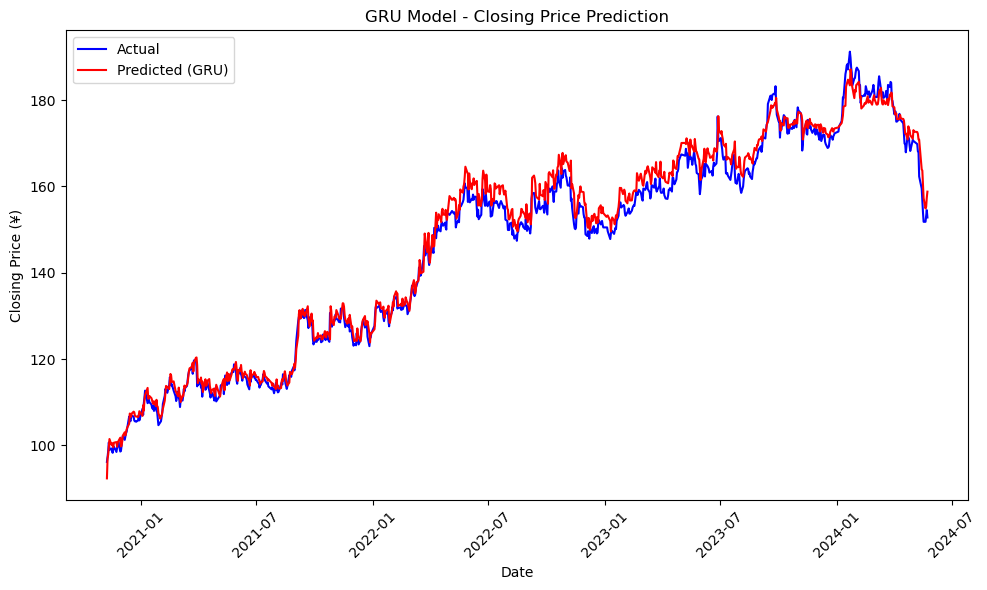

MSE: 7.77751
MAE: 2.26085
R-Squared: -1753.92363


In [31]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Prepare the data for GRU
def create_dataset(data, time_step=10):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

# Assuming 'df' is your DataFrame with the 'Date' and 'Closing Price' columns
# Convert 'Closing Price' to a numpy array
data = df['Closing Price'].values.reshape(-1, 1)

# Split data into training and testing sets
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size], data[train_size:]

# Create the GRU input dataset
time_step = 50
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build GRU model
model_gru = Sequential()
model_gru.add(GRU(units=128, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(units=64))
model_gru.add(Dense(1))

# Compile and train the GRU model
model_gru.compile(loss='mean_squared_error', optimizer='adam')
model_gru.fit(X_train, Y_train, epochs=25, batch_size=32, verbose=1)

# Predict on test data
gru_predictions = model_gru.predict(X_test)

# Calculate evaluation metrics for GRU
mse_gru = mean_squared_error(Y_test, gru_predictions)
mae_gru = mean_absolute_error(Y_test, gru_predictions)

# Calculate R-Squared
ss_res = np.sum((Y_test - gru_predictions) ** 2)
ss_tot = np.sum((Y_test - np.mean(Y_test)) ** 2)
rsq_gru = 1 - (ss_res / ss_tot)

# Plot the GRU results
plt.figure(figsize=(10,6))
plt.plot(df['Date'][train_size+time_step:], Y_test, label='Actual', color='blue')
plt.plot(df['Date'][train_size+time_step:], gru_predictions, label='Predicted (GRU)', color='red')
plt.title('GRU Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print evaluation metrics with 5 decimal places
print(f'MSE: {mse_gru:.5f}')
print(f'MAE: {mae_gru:.5f}')
print(f'R-Squared: {rsq_gru:.5f}')
